# BDP Final Assignment: Twitter Education, Part 3 (Measuring Influence)

Recall

In [9]:
#Ensure we are using the right kernel
spark.version

'3.1.3'

In [10]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_rows')

#from itertools import compress 
import seaborn as sns 
import matplotlib.pyplot as plt

#import warnings
#warnings.filterwarnings(action='ignore')
#warnings.simplefilter('ignore')

In [11]:
from pyspark.sql.functions import *
from pyspark.sql import functions as F
from pyspark.sql.types import *
from pyspark.sql import SparkSession

GCP Tools and Functions

In [12]:
from google.cloud import storage

In [13]:
# Reading data from open bucket
# Located at my BDP-bucket
dataPath = 'gs://msca-bdp-students-bucket/shared_data/hjiang248/final_sdf_v9_formatted_2'

In [14]:
spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

# Read data

In [15]:
%%time

education_DF = spark.read.parquet(dataPath)

CPU times: user 5.21 ms, sys: 3.37 ms, total: 8.57 ms
Wall time: 6.49 s


In [16]:
education_DF.printSchema()

root
 |-- date: date (nullable = true)
 |-- id: long (nullable = true)
 |-- text: string (nullable = true)
 |-- retweeted: string (nullable = true)
 |-- favorite_count: integer (nullable = true)
 |-- retweet_count: integer (nullable = true)
 |-- quote_count: long (nullable = true)
 |-- source_rt_usr_id: long (nullable = true)
 |-- source_rt_id: long (nullable = true)
 |-- location: string (nullable = true)
 |-- country: string (nullable = true)
 |-- country_code: string (nullable = true)
 |-- verified_user: boolean (nullable = true)
 |-- user_id: long (nullable = true)
 |-- user_name: string (nullable = true)
 |-- followers_count: integer (nullable = true)
 |-- user_description: string (nullable = true)
 |-- organization: string (nullable = true)



# Timeseries Analysis

## Tweet count of organizations

In [17]:
# filter users that are cetegorized as 'Other'
time_series_DF = education_DF.filter(education_DF.organization != 'Other')

In [18]:
# obtain counts of tweets via groupby of organization and date
time_series_org = time_series_DF.select(['date', 'organization']).groupBy('organization', 'date').count()

In [19]:
time_series_org.limit(10)

organization,date,count
News_Media,2022-04-15,178
Celebrity_Influencer,2022-06-08,76
Government_Entities,2022-06-18,23
Celebrity_Influencer,2022-10-04,60
Celebrity_Influencer,2022-05-28,57
Celebrity_Influencer,2022-06-28,74
Government_Entities,2022-10-06,42
Schools,2022-10-10,4
Universities,2022-05-04,80
Government_Entities,2022-05-17,37


In [20]:
# check the length of dataframe before converting to Pandas
#time_series_org.count()

In [21]:
# convert spark dataframe to pandas dataframe before plotting
timeseries_pd = time_series_org.toPandas()

## Total tweet count by date

In [22]:
ttl_time_series = time_series_DF.groupBy('date').count()

In [23]:
# check the length
#ttl_time_series.count()

In [24]:
total_tweets_pd = ttl_time_series.toPandas()

## Plot

Plot By Org Type

In [25]:
#timeseries_pd.date.max()

In [26]:
plt.rcParams.update({'font.size': 10})

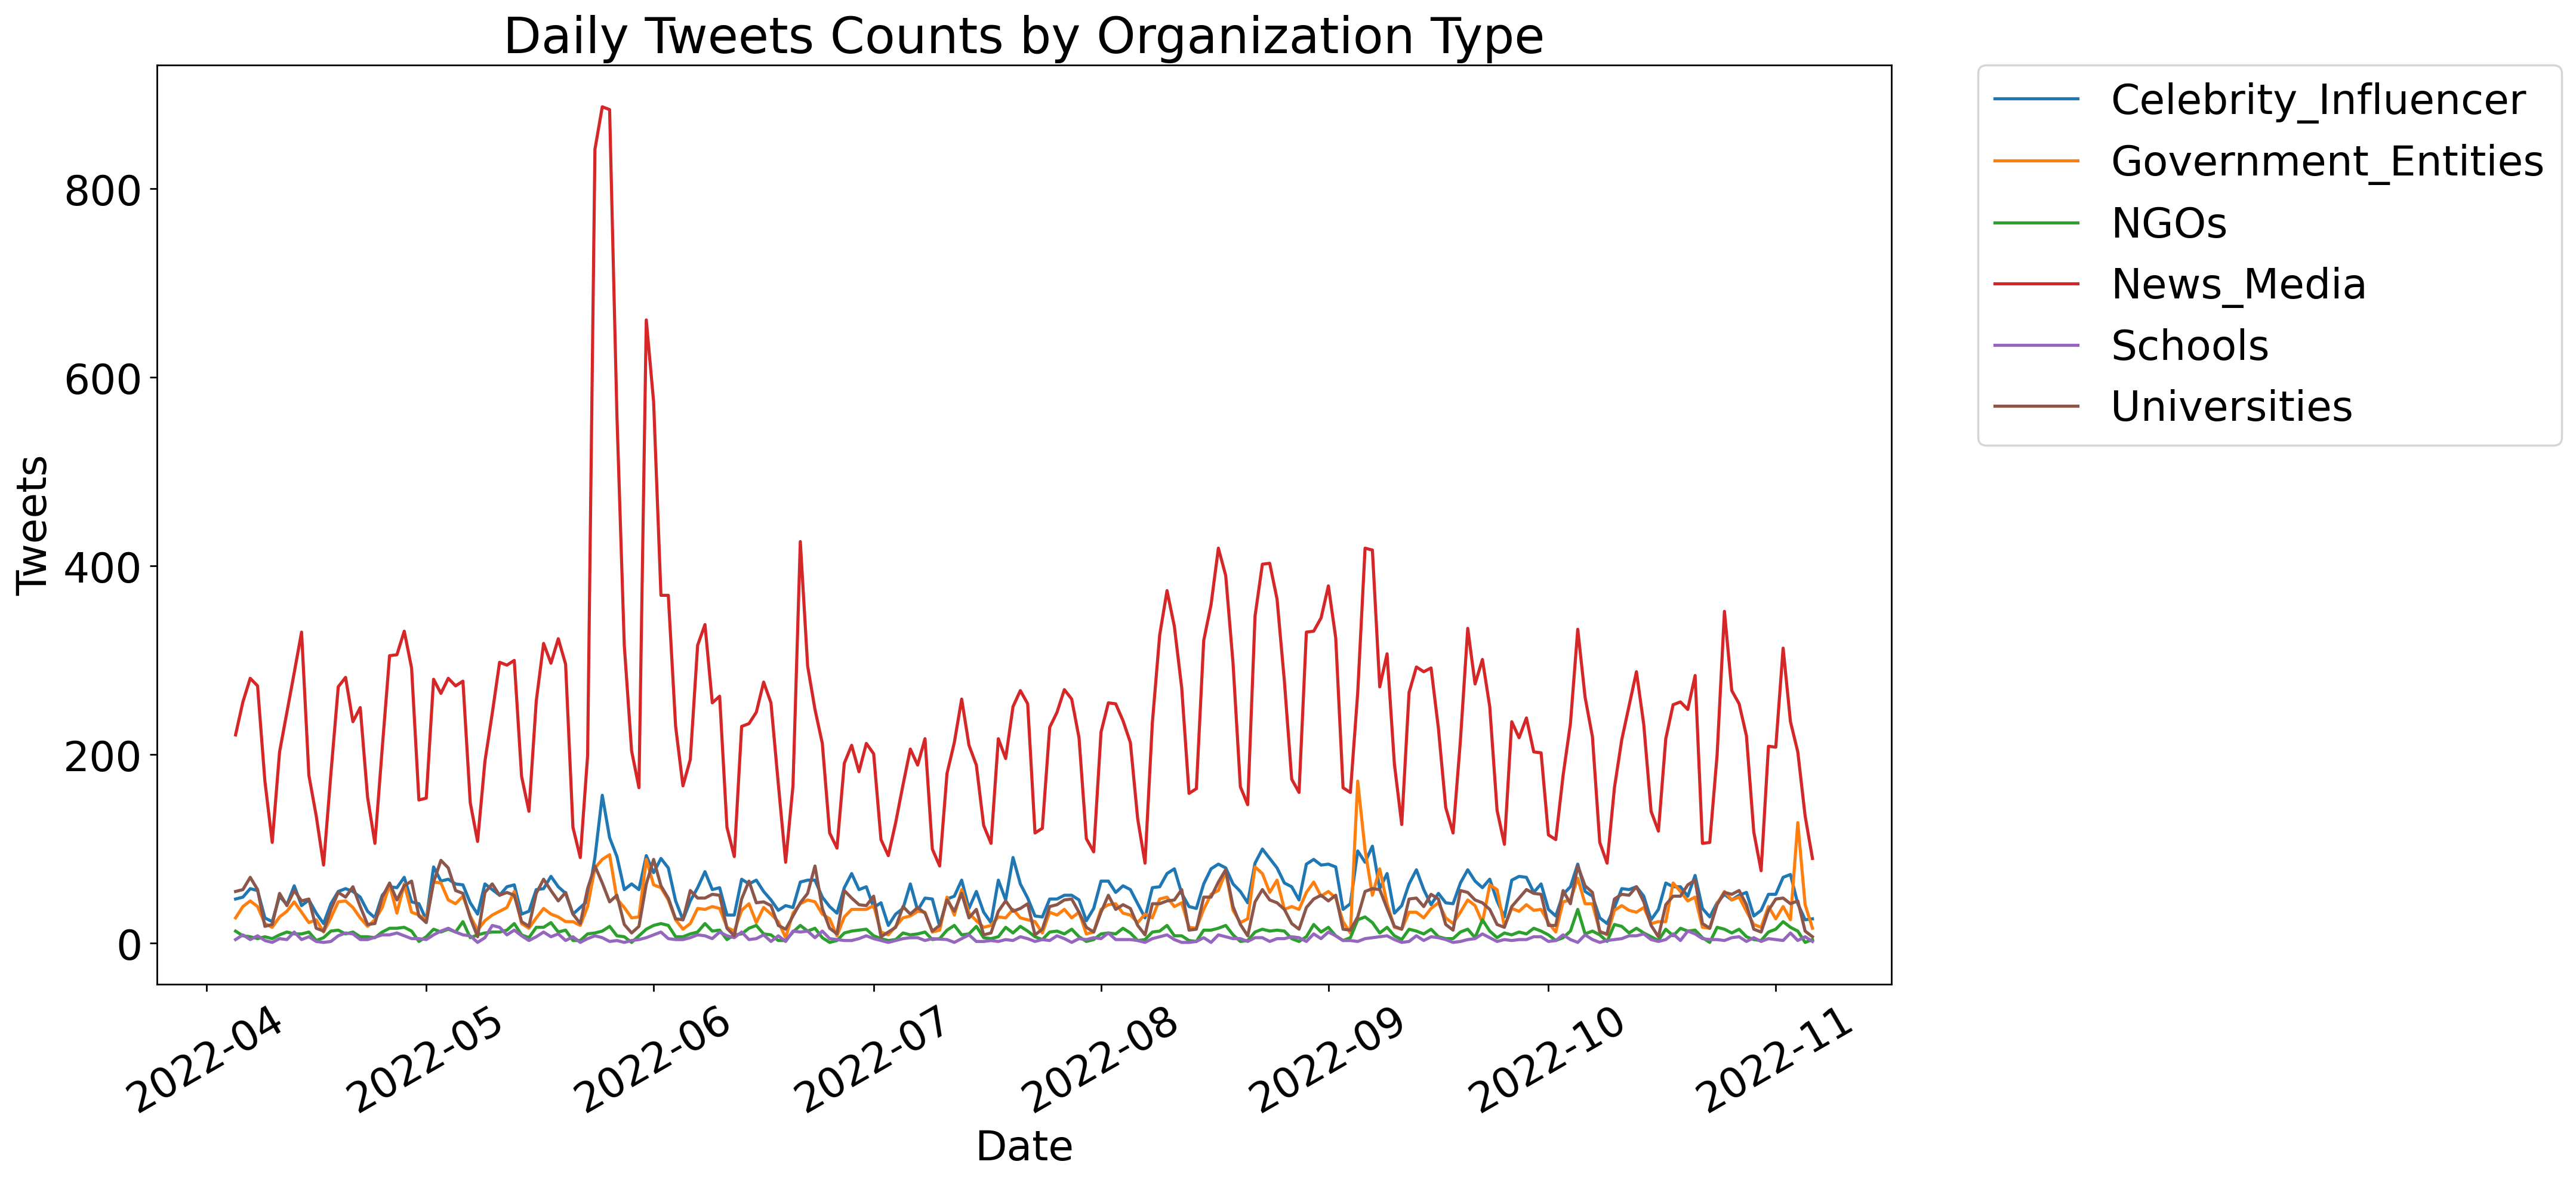

22/12/07 22:37:36 WARN io.netty.channel.nio.NioEventLoop: Selector.select() returned prematurely 512 times in a row; rebuilding Selector io.netty.channel.nio.SelectedSelectionKeySetSelector@69bad4a.
ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1207, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1033, in send_command
    response = connection.send_command(command)
  File "/usr/lib/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1211, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while receiving
/usr/lib/spark/python/pyspark/context.py:460: Runti

In [36]:
fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (18, 10)
plt.rcParams['figure.dpi'] = 250
plt.rcParams.update({'font.size': 20})

for label, org in timeseries_pd.groupby('organization'):
    org.plot(x = 'date', y = 'count',ax = ax, label = label, 
             xlabel='Date', ylabel='Tweets', title='Daily Tweets Counts by Organization Type')
    plt.xticks(rotation=30)
    plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

    
plt.show()

Plot by Total Tweet

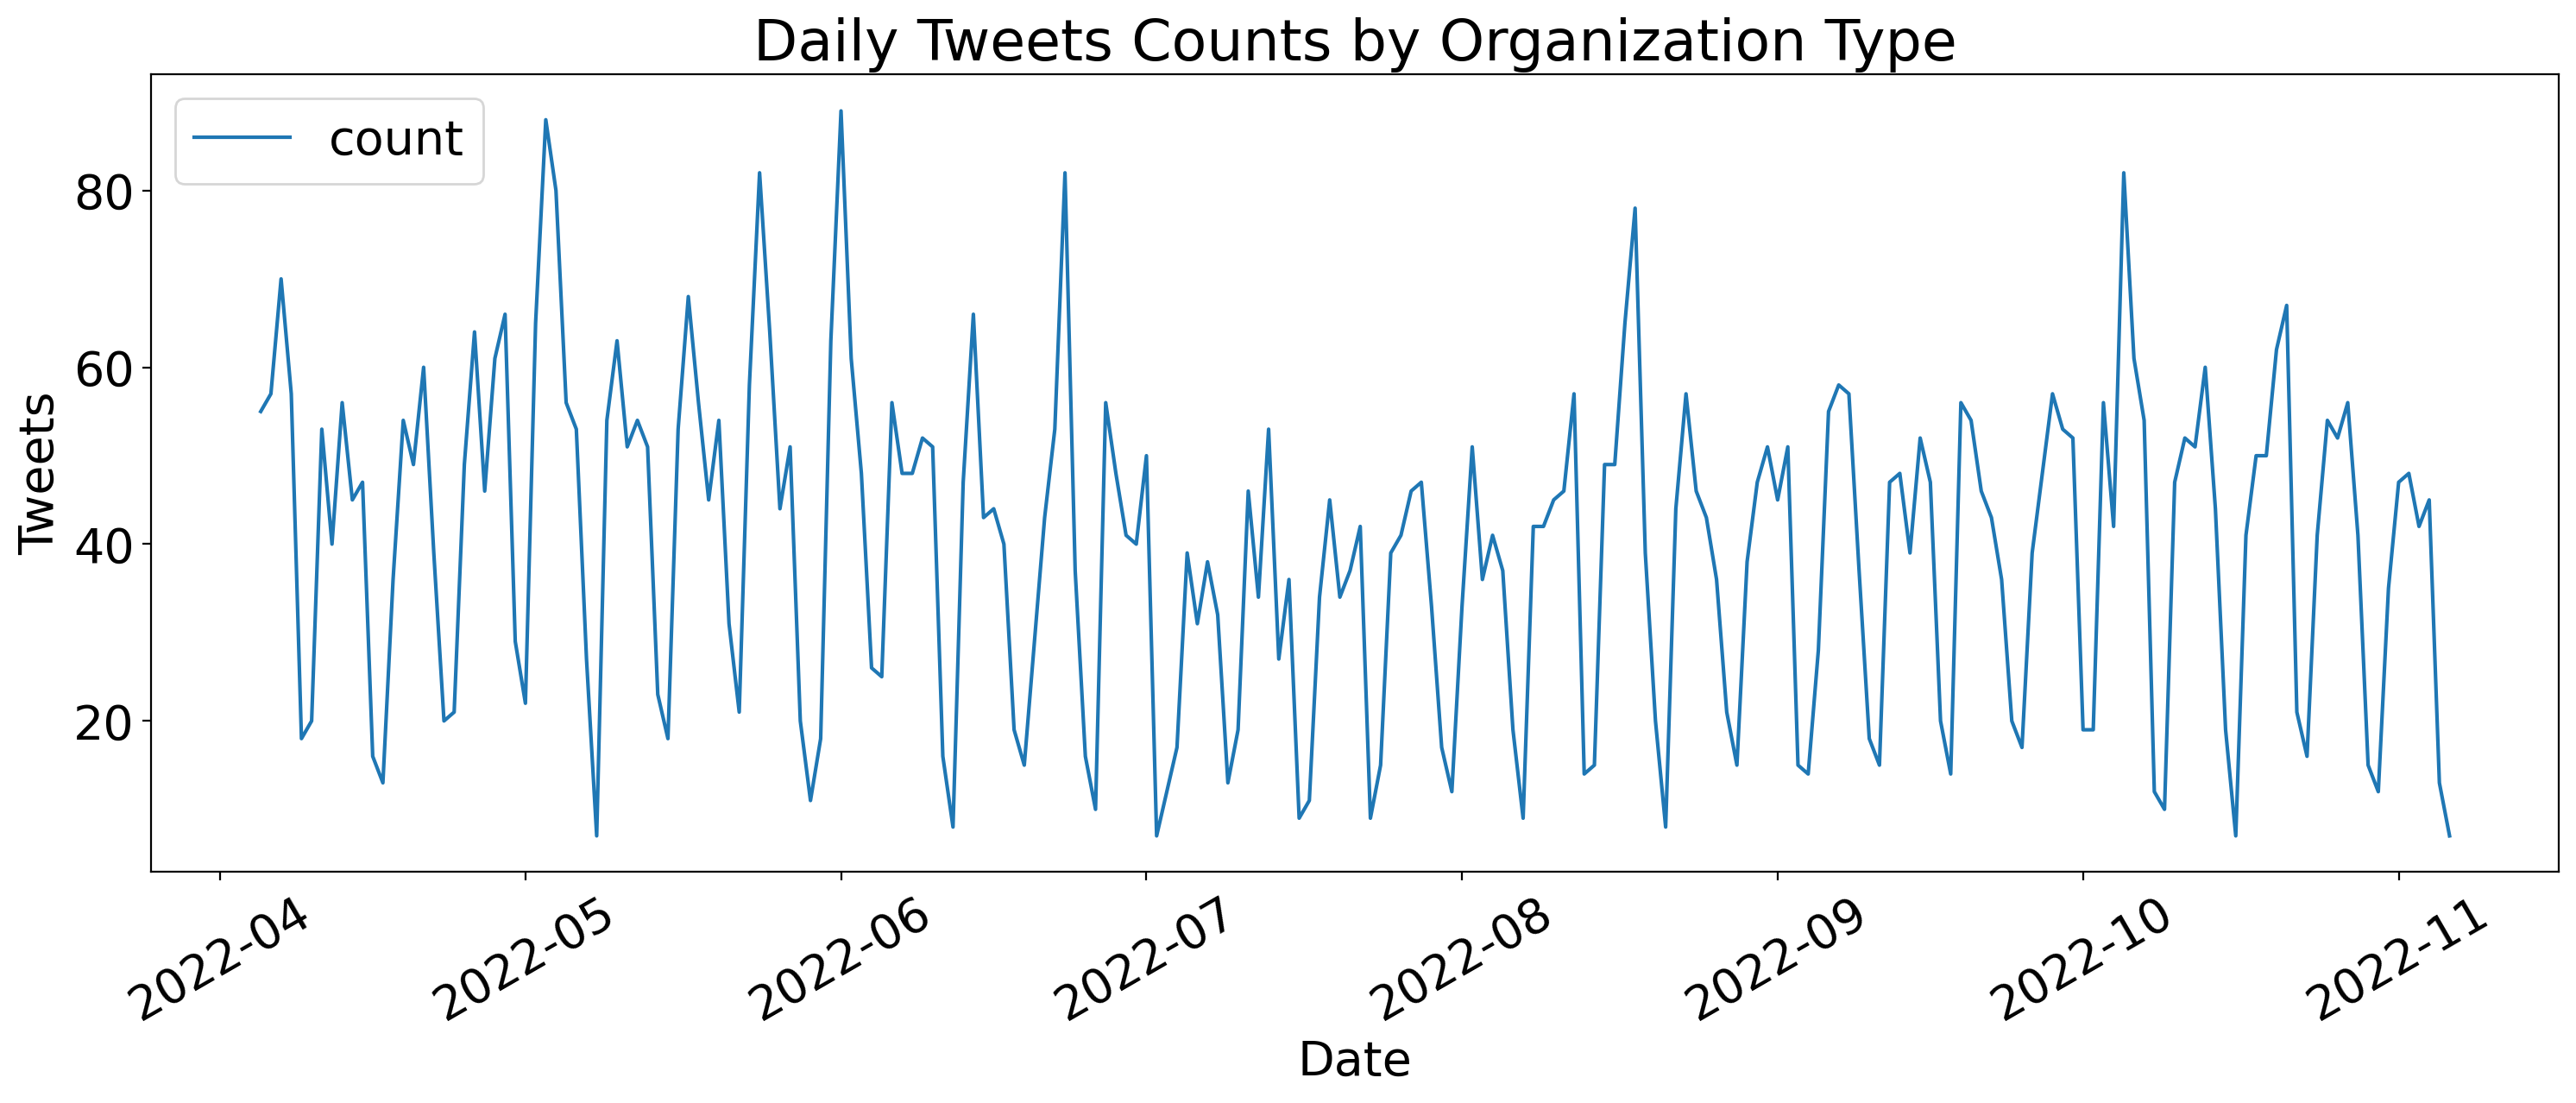

In [30]:
plt.rcParams["figure.figsize"] = (18,6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size': 20})

org.plot(x = 'date', y = 'count',
         xlabel='Date', ylabel='Tweets', title='Daily Tweets Counts by Organization Type')
plt.xticks(rotation=30)
plt.legend(loc=2)

    
plt.show()